In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### Consider data

No handles with labels found to put in legend.


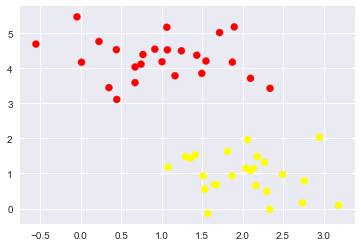

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'); plt.legend()

We can try to seperate them with a line by hand, however there is some ambiguity
* we can draw more that one line, which perfectly discriminate between samples
* depending on which line is chosen a new data point "x" would lie at upper or lower side

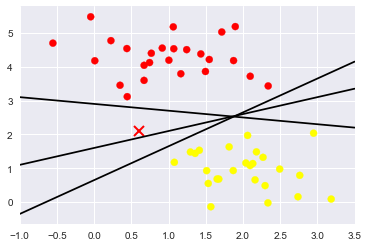

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k') #-k makes all lines black

plt.xlim(-1, 3.5);

A way to improvie this is to use Supported Vector Machines, which rather than drawing 0-width line between the classes line is drawn with some $\begin{equation} margin \end{equation}$

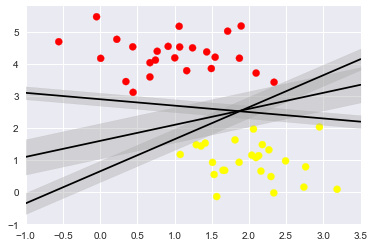

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Function for plotting

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

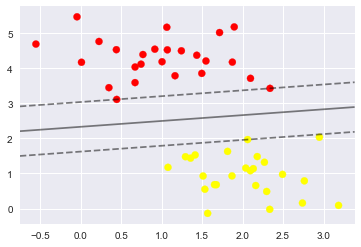

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

* few points touch the marging, they are called <html> <b> support vectors </b></html>
* they are stored in support_vectors_ attribute of the classifier

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Key point of the classifier is that only support vectors matters at prediction. Further points does not change overall outcome. Let's compare model results for 

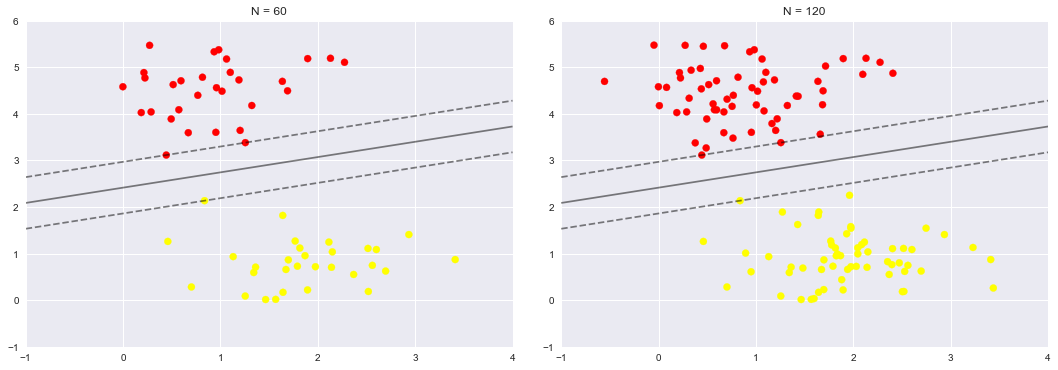

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [10]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[60, 120, 300], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(60, 120, 300), value=60), Output()), _dom_classes=('w…

<function __main__.plot_svm>

SVM becomes extremely powerful with kernels. Data are projected into higher-dimensional space and therefore it is possible to fit nonlinear relationships with a linear classifier. 

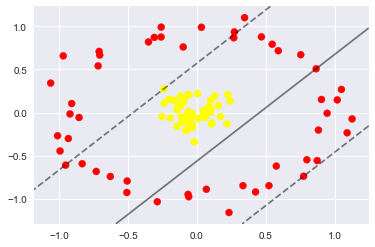

In [11]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

No linear classifier can fit to theses data but if we project this data into higher dimension such that a linear separator would be sufficient. Radial basis function can be utilized. 

In [12]:
r = np.exp(-(X ** 2).sum(1))

In [16]:
r

array([0.44050426, 0.45270356, 0.87545963, 0.99298837, 0.99502558,
       0.99732391, 0.99656898, 0.97904015, 0.97289856, 0.93528415,
       0.35129272, 0.93745429, 0.99887486, 0.95198394, 0.93784995,
       0.99031203, 0.37658843, 0.9594521 , 0.42239253, 0.95352328,
       0.43273724, 0.97063159, 0.30553775, 0.96889677, 0.97677447,
       0.45195289, 0.95334121, 0.40886189, 0.4793312 , 0.97883668,
       0.24784044, 0.93474306, 0.97186873, 0.34626907, 0.98804855,
       0.9963629 , 0.28792245, 0.37135808, 0.42760327, 0.27804534,
       0.26499765, 0.39658165, 0.33432867, 0.92643114, 0.35162974,
       0.36521679, 0.55603122, 0.98628833, 0.97591129, 0.99467481,
       0.43980823, 0.43137151, 0.95041115, 0.44667827, 0.98670384,
       0.95478356, 0.38826888, 0.27941743, 0.41269885, 0.38922861,
       0.96964291, 0.48822405, 0.32760988, 0.39213098, 0.37207203,
       0.34223765, 0.42611823, 0.36606371, 0.25333656, 0.31819475,
       0.94736409, 0.99577529, 0.36799991, 0.30947026, 0.97991

In [18]:
from mpl_toolkits import mplot3d
%matplotlib inline

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azim=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…